In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [11]:
data2 = pd.read_csv(r"C:\Users\Nandini\Desktop\ml\diabetes (1).csv")

In [12]:
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
def isnull(data):
    print(data.isna().sum())

In [14]:
isnull(data2)
print(data2)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72           

In [15]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
data2.drop(['Outcome'],axis= 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
data2.columns
data2.replace(0, np.nan, inplace=True)

In [18]:
print(data2.isna().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [19]:
data2['SkinThickness']=data2['SkinThickness'].fillna(data2['SkinThickness'].mean())
data2['Insulin']=data2['Insulin'].fillna(data2['Insulin'].mean())
data2['Pregnancies']=data2['Pregnancies'].fillna(data2['Pregnancies'].mean())

In [20]:
def shape(data):
    print(data.shape)

In [21]:
shape(data2)
print(data2)

(768, 9)
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0       35.00000  155.548223  33.6   
1       1.000000     85.0           66.0       29.00000  155.548223  26.6   
2       8.000000    183.0           64.0       29.15342  155.548223  23.3   
3       1.000000     89.0           66.0       23.00000   94.000000  28.1   
4       4.494673    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0       48.00000  180.000000  32.9   
764     2.000000    122.0           70.0       27.00000  155.548223  36.8   
765     5.000000    121.0           72.0       23.00000  112.000000  26.2   
766     1.000000    126.0           60.0       29.15342  155.548223  30.1   
767     1.000000     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                   

In [22]:
data2['BloodPressure'] = data2['BloodPressure'].fillna(0)
data2['BMI'] =data2['BMI'].fillna(0)
data2['Glucose'] = data2['Glucose'].fillna(0)

data2['Outcome'].fillna(0)



print(data2['BloodPressure'])
print(data2['BMI'])

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


In [23]:
print(data2.isna().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [24]:
def pair2(data2):
    sns.pairplot(data2,x_vars=['Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin','SkinThickness','BloodPressure','Glucose','Pregnancies'],y_vars=['Outcome'])
    plt.show()

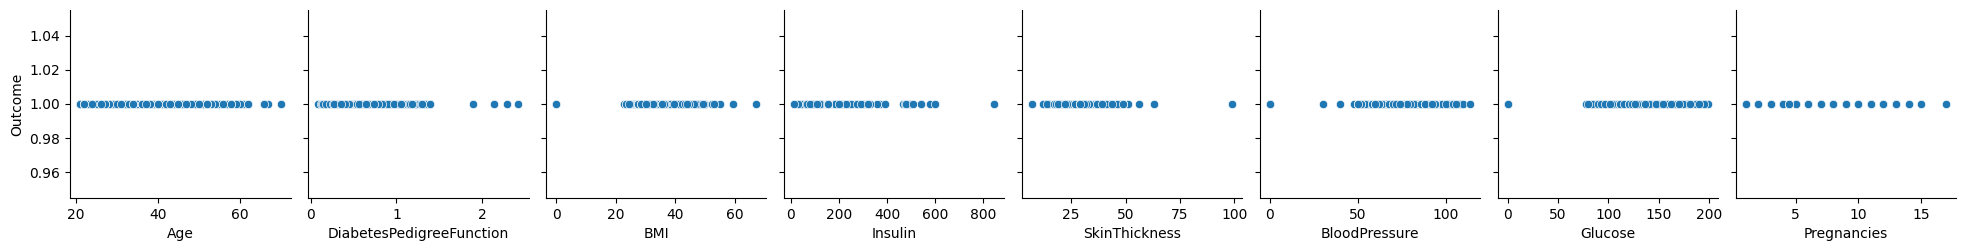

In [25]:
pair2(data2)

In [26]:
def corelation(data):
    sns.heatmap(data.corr(),annot= True)
    plt.title(f"{data} corelation")
    plt.figure(figsize=(128,8))
    plt.show()

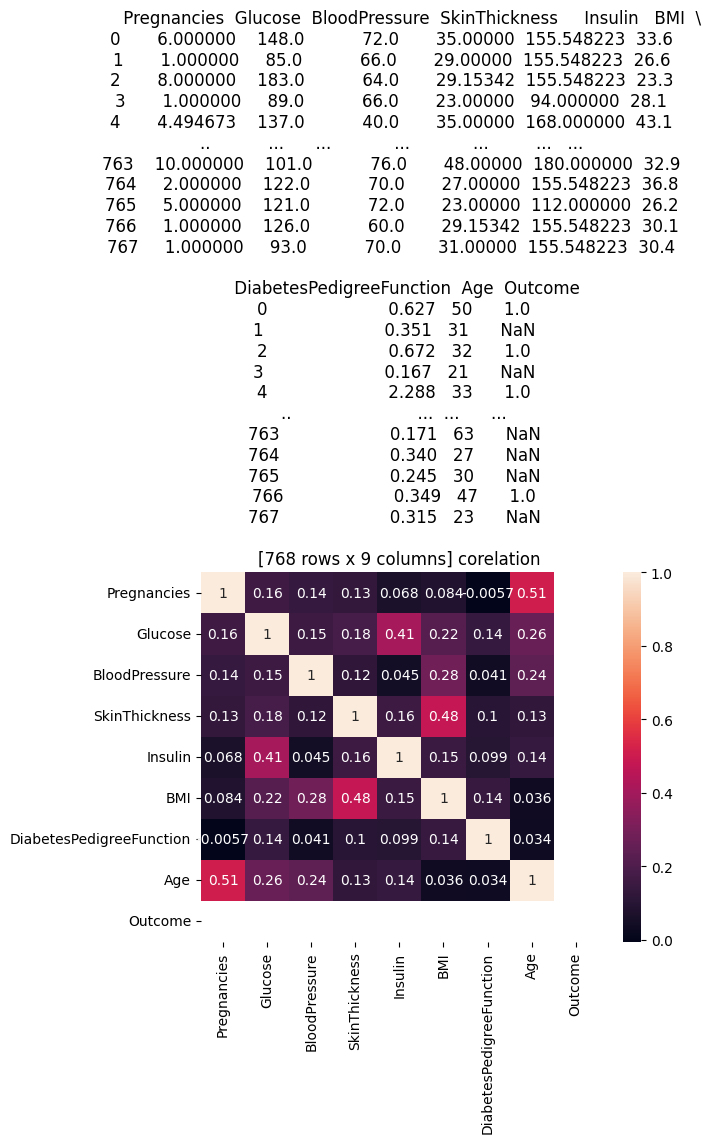

<Figure size 12800x800 with 0 Axes>

In [27]:
corelation(data2)

In [28]:
print(np.isinf(data2).sum())
print(data2.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [30]:
data2['Outcome']=data2['Outcome'].fillna(0)
data2.drop(['DiabetesPedigreeFunction','SkinThickness'],axis=1)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,6.000000,148.0,72.0,155.548223,33.6,50,1.0
1,1.000000,85.0,66.0,155.548223,26.6,31,0.0
2,8.000000,183.0,64.0,155.548223,23.3,32,1.0
3,1.000000,89.0,66.0,94.000000,28.1,21,0.0
4,4.494673,137.0,40.0,168.000000,43.1,33,1.0
...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,180.000000,32.9,63,0.0
764,2.000000,122.0,70.0,155.548223,36.8,27,0.0
765,5.000000,121.0,72.0,112.000000,26.2,30,0.0
766,1.000000,126.0,60.0,155.548223,30.1,47,1.0


In [31]:
X = data2  #These are features other than the outcome
y = data2['Outcome']   

x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)

In [32]:
# Fill NaN values in the 'Outcome' column with 0


print(data2)

In [33]:
print(y_train.value_counts())

Outcome
0.0    401
1.0    213
Name: count, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline

In [35]:
# fitting the data in our model 
# for this test we'll use RandomForestRegression
# Using GridSearchCV find hyperparameters
rf = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=80,max_depth=None,min_samples_leaf=1,min_samples_split=3))
rf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=3, n_estimators=80))])

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [37]:
# To find errors to find which model is most suitable
y_pred = rf.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2e = r2_score(y_test,y_pred)

In [38]:
print("Mean absolute error of RandomForest algorithm is:",mae)
print("Mean squared error of RandomForest algorithm is:",mse)
print("Rsquared error of RandomForest algorithm is:",r2e)

# Rsquared error is negative 
# Not a good algorithm for diabetes prediction

Mean absolute error of RandomForest algorithm is: 0.0
Mean squared error of RandomForest algorithm is: 0.0
Rsquared error of RandomForest algorithm is: 1.0


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# This shows that logistic regression isn't a efficient way to predict whether a person is diabetic or not
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)
y_pred2 = pipe.predict(x_test)
mae2 = mean_absolute_error(y_test,y_pred2)
mse2 = mean_squared_error(y_test,y_pred2)
r2e2 = r2_score(y_test,y_pred2)

In [41]:
print("Mean absolute error of Logistic regression is:",mae2)
print("Mean squared error of Logistic regression is:",mse2)
print("Rsquared error of Logistic regression is:",r2e2)

Mean absolute error of Logistic regression is: 0.0
Mean squared error of Logistic regression is: 0.0
Rsquared error of Logistic regression is: 1.0


In [42]:
from xgboost import XGBClassifier
import xgboost as xgb

In [43]:
param_grid = {
    'n_estimators': [100, 200],        # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],            # Maximum depth of a tree
    'min_child_weight': [1, 2, 3],     # Minimum sum of instance weight
    'subsample': [0.6, 0.8, 1.0],      # Fraction of samples to use for fitting
    'colsample_bytree': [0.6, 0.8, 1.0] # Fraction of features to use
}

In [44]:
model = xgb.XGBClassifier()  # For classification

In [45]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)  # n_jobs=-1 uses all processors


In [46]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [47]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}
Best Cross-Validation Score: 0.0


In [67]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test Set MSE:", mse)


Test Set MSE: 0.0


In [83]:
print(data2)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0       35.00000  155.548223  33.6   
1       1.000000     85.0           66.0       29.00000  155.548223  26.6   
2       8.000000    183.0           64.0       29.15342  155.548223  23.3   
3       1.000000     89.0           66.0       23.00000   94.000000  28.1   
4       4.494673    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0       48.00000  180.000000  32.9   
764     2.000000    122.0           70.0       27.00000  155.548223  36.8   
765     5.000000    121.0           72.0       23.00000  112.000000  26.2   
766     1.000000    126.0           60.0       29.15342  155.548223  30.1   
767     1.000000     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [68]:
xg = XGBClassifier(learning_rate = 0.01,max_depth= 3,colsample_bytree = 0.6,min_child_weight = 1, n_estimators = 50,subsample = 0.6)
xg.fit(x_train,y_train)
importance = xg.feature_importances_

In [87]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
threshold = 0.02
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature']
print("Selected Features:", selected_features.tolist())

Selected Features: ['Outcome', 'Glucose', 'Age', 'BMI', 'Insulin']


In [70]:
from sklearn.inspection import permutation_importance


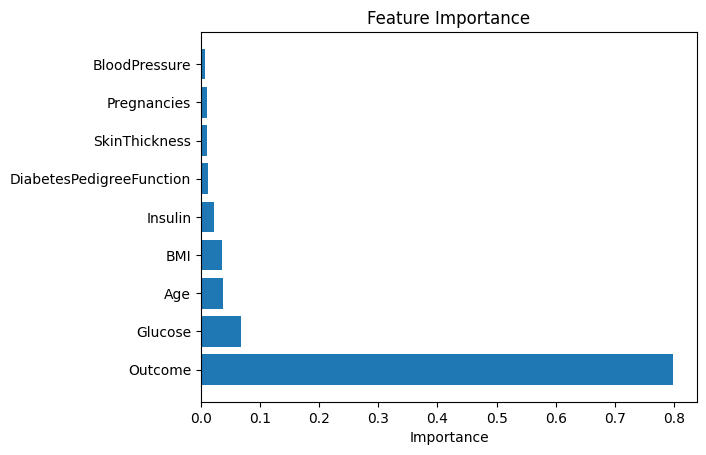

In [71]:
plt.barh(importance_df ['Feature'], importance_df ['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [72]:
ypred2 = xg.predict(x_test)
mae3 = mean_absolute_error(y_test,ypred2)
mse3 = mean_squared_error(y_test,ypred2)
r2e3 = r2_score(y_test,ypred2)

In [73]:
print(mae3)
print(mse3)
print(r2e3)

0.06493506493506493
0.06493506493506493
0.7171717171717171


In [74]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,f1_score,precision_recall_fscore_support,confusion_matrix,precision_score,recall_score,accuracy_score

In [75]:
fpr1 ,tpr1 ,thresholds = roc_curve(y_test,ypred2)
area1 = auc(fpr1,tpr1)
print(fpr1)
print(tpr1)
print("Probability of positive class is: ",area1*100)

[0. 0. 1.]
[0.         0.81818182 1.        ]
Probability of positive class is:  90.90909090909092


In [76]:
y_pred_labels = (ypred2 >= 0.5).astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 0.8181818181818182
F1 Score: 0.9


In [77]:
accuracy = accuracy_score(y_test,y_pred_labels)

In [78]:
print(accuracy)

0.935064935064935


In [79]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[99  0]
 [10 45]]


In [80]:
# This can be the case for data-leakage or overfitting so let's check the cross validation score
from sklearn.model_selection import cross_val_score

In [81]:
cv_scores = cross_val_score(xg, x_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

#This model does not overfit data as in Logistic Regression and RandomForest
# This is the suitable model for diabetes prediction

Cross-validation scores: [0.95121951 0.93495935 0.94308943 0.92682927 0.94262295]
Mean cross-validation score: 0.9397441023590563


In [82]:
print(data2)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0       35.00000  155.548223  33.6   
1       1.000000     85.0           66.0       29.00000  155.548223  26.6   
2       8.000000    183.0           64.0       29.15342  155.548223  23.3   
3       1.000000     89.0           66.0       23.00000   94.000000  28.1   
4       4.494673    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0       48.00000  180.000000  32.9   
764     2.000000    122.0           70.0       27.00000  155.548223  36.8   
765     5.000000    121.0           72.0       23.00000  112.000000  26.2   
766     1.000000    126.0           60.0       29.15342  155.548223  30.1   
767     1.000000     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [84]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.494673,2.975395,1.000,2.00000,4.494673,6.000000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.000000,140.250000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.000000,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.000000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00
